For next lesson it will related to statistical inference

General Definition:<br>
Statistical inference refers to the process of drawing conclusions from the model estimation

Reference: https://www.sciencedirect.com/topics/neuroscience/statistical-inference#:~:text=Statistical%20inference%20is%20the%20process,data%20drawn%20from%20that%20population.


<h4>Binomial Distribution: Story</h4>
<ul>
    <li>The number of heads in 4 coin flip with 0.5 probability of head</li>
</ul>

### Simulating 4 coin flip(statistical part 1)

In [2]:
import numpy as np

n_all_heads = 0

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads/1000

0.575

That code above doesnt work as spose to be, the result shall be 0.062

In [20]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.random.random(size=4)

random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [21]:
heads = random_numbers < 0.5

heads

array([ True, False, False, False])

In [22]:
np.sum(heads)

1

In [23]:
n_all_heads = sum([1 for _ in range(10000) if sum(np.random.random(size=4) < 0.5) == 4])
n_all_heads

619

In [24]:
n_all_heads/10000

0.0619

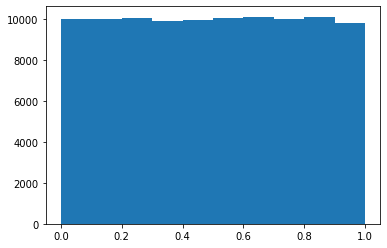

In [8]:
from matplotlib import pyplot as plt
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


## Bernoulli trials

what is Bernoulli trials?

what is the function?

how it used?

what situation that need bernoulli trials?

In the theory of probability and statistics, a Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.It is named after Jacob Bernoulli, a 17th-century Swiss mathematician, who analyzed them in his Ars Conjectandi (1713).

reference: https://en.wikipedia.org/wiki/Bernoulli_trial

### 3.2.2  The np.random module and Bernoulli trials

The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability  <b>1-p</b> of landing heads (success) and probability  of landing tails (failure). In this exercise, you will write a function to perform <b>n</b> Bernoulli trials, <b>perform_bernoulli_trials(n, p)</b>, which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the <b>np.random.random()</b> function, which returns a random number between zero and one

#### Instruction

<ul>
    <li>Define a function with signature perform_bernoulli_trials(n, p).</li>
    <li>Initialize to zero a variable n_success the counter of Trues, which are Bernoulli trial successes.</li>
    <li>Write a for loop where you perform a Bernoulli trial in each iterat
        ion and increment the number of success if the result is True. Perform n iterations by looping over range(n). 
        <ul>
            <li>To perform a Bernoulli trial, choose a random number between zero and one using np.random.random().If the number you chose is less than p, increment n_success (use the += 1 operator to achieve this).
            </li>
        </ul>
    </li>
    <li>The function returns the number of successes n_success</li>
</ul>

In [30]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        randoms = np.random.random()

        # If less than p, it's a success so add one to n_success
        if randoms < p:
            n_success += 1

    return n_success

### How many defaults might we expect?

Let's say a bank made <b>100 mortgage loans</b>. It is possible that anywhere <b>between 0 and 100 of the loans</b> will be defaulted upon. 

You would like to know the probability of getting a given number of defaults, given that the probability of a default is <b>p = 0.05</b>. To investigate this, you will do a simulation. 

You will perform <b>100 Bernoulli trials</b> using the <b>perform_bernoulli_trials()</b> function you wrote in the previous exercise and record how many defaults we get. 

Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to <b>True</b>, i.e., did the loan recipient default?) You will do this for another <b>100</b> Bernoulli trials. And again and again until we have tried it <b>1000</b> times. Then, you will plot a histogram describing the probability of the number of defaults.



#### instruction

<ul>
    <li>Seed the random number generator to 42.</li>
    <li>Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.</li>
    <li>Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - in this case the probability of a default, which is 0.05. On each iteration of the loop store the result in an entry of n_defaults.</li>
    <li>Plot a histogram of n_defaults. Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.</li>
    <li>Show your plot.</li>
</ul>

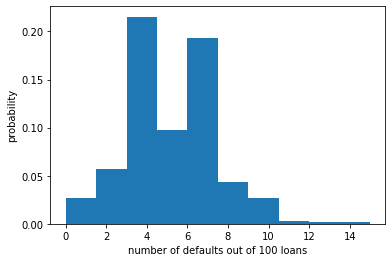

In [33]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
# _ = plt.hist(n_defaults, normed=True)
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

### Will the bank fail?

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.
<br>
If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?



<li>Compute the x and y values for the ECDF of n_defaults.</li>
<li>Plot the ECDF, making sure to label the axes. Remember to include marker = '.' and linestyle = 'none' in addition to x and y in your call plt.plot().</li>
<li>Show the plot.</li>
<li>Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of n_defaults is >= 10. Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.</li>
<li>The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10. Print this result by hitting 'Submit Answer'!</li>


In [25]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## 1.4.1  Computing the ECDF

 In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:
<code>
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
</code>
The function foo() above takes two arguments a and b and returns two values x and y. The function header def foo(a,b): contains the function signature foo(a,b), which consists of the function name, along with its parameters. For more on writing your own functions, see DataCamp's course Python Data Science Toolbox (Part 1)!



### Instruction

<li>Define a function with the signature ecdf(data). Within the function definition,</li>
<ul><li>Compute the number of data points, n, using the len() function.</li>
    <li>The -values are the sorted data. Use the np.sort() function to perform the sorting.</li>
<li>The  data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.</li>
    <li>The function returns the values x and y.</li><ul>

In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


#### With list comprehension

In [18]:
def perform_bernoulli_trials(n: int=100000, p: float=0.5) -> int:
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes.
    n: number of iterations
    p: target number between 0 and 1, inclusive
    """

    return sum([1 for _ in range(n) if np.random.random() < p])

In [20]:
n_defaults = np.asarray([perform_bernoulli_trials(100, 0.05) for _ in range(1000)])
n_defaults

array([ 8,  6,  4,  2,  4,  3,  6,  3,  1,  7,  5,  2,  3,  6,  6,  4,  5,
        5,  4,  6,  2,  6,  9,  7,  4,  3,  4,  6,  5,  4,  3,  5,  4,  6,
        4,  3,  5,  4,  5,  1,  3,  4,  3,  3,  9,  6,  8,  5,  4,  6,  3,
        4,  2,  4,  4,  5,  5,  4,  5,  8,  2,  4,  4,  2,  3,  4,  1,  5,
        5,  3,  4,  9,  5, 11,  4,  4,  2,  3,  6,  5,  1, 11,  4,  4,  9,
       10,  5,  7,  5,  2,  4,  7,  4,  2,  6,  6,  7,  5,  4,  4,  4,  2,
        6,  5,  3,  6,  6,  6,  3,  8,  1,  3,  7,  7,  7,  4,  4,  5,  4,
        4,  3, 10,  6,  8,  2,  3,  5,  1,  3,  4,  5,  5,  6,  2,  4,  6,
        7,  3,  5,  5,  5,  4,  6,  4,  4,  1, 10,  5,  3,  5,  4,  8,  3,
        7,  3,  9,  5, 10,  5,  2,  3, 10,  7,  4,  3,  3,  7,  5,  1,  3,
        6,  3,  5,  8,  2,  7, 10,  3,  4,  5,  9,  6,  4,  2,  3,  8,  3,
        4,  3,  9,  4,  7,  2,  3,  2,  5,  7,  5,  6,  6,  3, 11,  7,  5,
        8,  6,  9,  5,  9,  4,  2,  8,  5,  9,  5,  4,  7,  7,  6,  4,  5,
        4,  5,  6,  4,  4

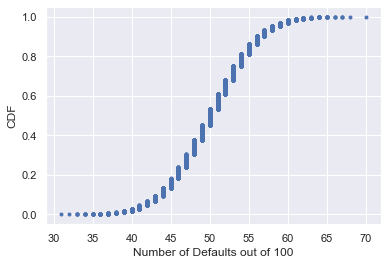

Probability of losing money = 1.0


In [24]:

# Compute ECDF: x, y
x, y = ecdf(n_defaults) 

# Plot the ECDF with labeled axes
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Number of Defaults out of 100')
plt.ylabel('CDF')

# Show the plot
plt.show()


# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


### Probability distributions and stories: The Binomial distribution

What is Binomial Distribution

Explanation:
https://www.youtube.com/watch?v=bT1p5tJwn_0

Definition :<br> 
https://towardsdatascience.com/understanding-bernoulli-and-binomial-distributions-a1eef4e0da8f

Related Topic: <br>
Probability Mas Function(PMF)

Reference: <br>
https://en.wikipedia.org/wiki/Probability_mass_function


Example of Binomial Distributed:
<ul>
    <li>The number r of success in n Bernouli Trial with probability p of success, is Binomialy distributed</li>
    <li>The number r heads in 4 coin flip with probability 0.5 of heads, is Binomially distributed</li>
</ul>

In [6]:
#code example
np.random.binomial(4, 0.5)

np.random.binomial(4, 0.5, size=10)

array([2, 0, 2, 3, 2, 2, 2, 3, 4, 2])

### The Binomial PMF

In [14]:
n =60

p = 0.1

samples = np.random.binomial(n, p, size=10000)
samples

array([6, 6, 5, ..., 7, 1, 3])

### The Binomial CMF

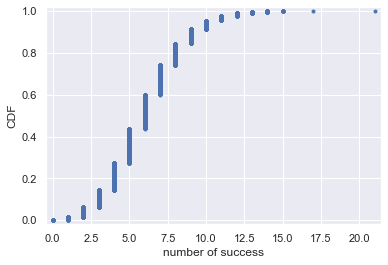

In [21]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

x, y = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)  #why should give margin?
_ = plt.xlabel("number of success")
_ = plt.ylabel("CDF")
plt.show()

### Exercise

<h1>Sampling out of the Binomial distribution</h1>
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using <b>np.random.binomial()</b>. This is identical to the calculation you did in the last set of exercises using your custom-written <b>perform_bernoulli_trials()</b> function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.<br>

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.



### Instruction

<ul>
    <li>Draw samples out of the Binomial distribution using np.random.binomial(). You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000.</li>
    <li>Compute the CDF using your previously-written ecdf() function.</li>
<li>Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.</li>
    <li>Show the plot.</li>
    </ul>

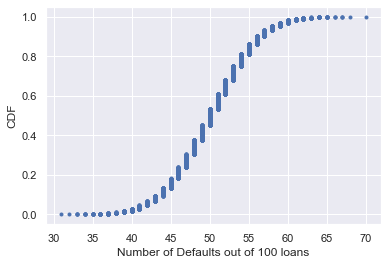

In [18]:
# Take 10,000 samples out of the binomial distribution: n_defaults
np.random.seed(42)
n_defaults = np.random.binomial(100, 0.5, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Number of Defaults out of 100 loans')
plt.ylabel('CDF')


# Show the plot
plt.show()


### Exercise

As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be <b>-0.5, 0.5, 1.5, 2.5, ... </b>up to <b>max(n_defaults) + 1.5</b>. You can generate an array like this using <b>np.arange()</b> and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.



### Instruction

<li>Using np.arange(), compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable bins.</li>
<li>Use plt.hist() to plot the histogram of n_defaults with the normed=True and bins=bins keyword arguments.</li>
<li>Show the plot.</li>


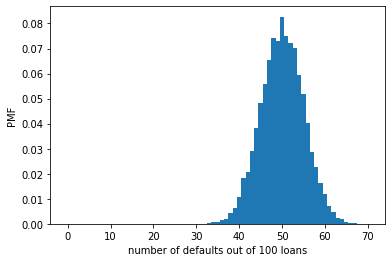

In [9]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults)  + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, normed=True, bins=bins)

# Label axes
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('PMF')


# Show the plot
plt.show()

# Poisson Processes

<li>The timing of next event is completly independent from when the previous event happen</li>

<br>
<h2>Example of Poisson Process</h2>
<ul>
    <li>Natural Birth in hospital</li>
    <li>Hit on website during rush hour</li>
    <li>Meteor Strikes</li>
    <li>Number of accident</li>
</ul>

reference:
    https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

### Example In Code

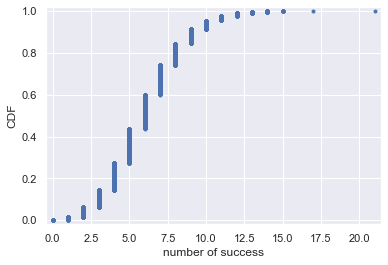

In [20]:
samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel("number of success")
_ = plt.ylabel("CDF")

plt.show()

### Exercise

<h3>Relationship between Binomial and Poisson distributions</h3><br>
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to  approximates a Binomial distribution for  Bernoulli trials with probability  of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10 .



### Instructions

<li>Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10.</li>
<li>Make a list of the n and p values to consider for the Binomial distribution. Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that  is always 10.</li>
<li>Using np.random.binomial() inside the provided for loop, draw 10000 samples from a Binomial distribution with each n, p pair and print the mean and standard deviation of the samples. There are 3 n, p pairs: 20, 0.5, 100, 0.1, and 1000, 0.01. These can be accessed inside the loop as n[i], p[i].</li>

In [ ]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


### How many no-hitters in a season?

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at retrosheet.org (license).

<li>Both Binomial and Poisson, though Poisson is easier to model and compute.</li>

### Exercise 

<h2>Was 2015 anomalous?</h2>
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?



### instructions

<li>Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.</li>
<li>Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.</li>
<li>Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000).</li>
<li>Hit 'Submit Answer' to print the probability that you calculated.</li>


In [28]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0069
